In [1]:
import sys
sys.path.append("..")

from algorithms import *
from analysis_util.visualize import *
from analysis_util.cylcle_classifier import Cycle_Classifier
from classes.environment import Environment

import h5py
import os

# Used for seed in np.random
Reproduce = 2023

In [2]:
Thetas = [0, 1/6, 2/6, 3/6, 4/6, 5/6, 1]
Qs = [1 + 0.5*i for i in range(7)]
env = Environment()

In [7]:
current_dir = os.getcwd()
file_path = os.path.join(current_dir, '..', '..', 'data', 'simulation_data.h5')

file = h5py.File(file_path, 'r')

group = file['Gamma098']

pi1_L = group['pi1_L'][:]; pi2_L = group['pi2_L'][:]
theta1_L = group['theta1_L'][:]; theta2_L = group['theta2_L'][:]
q1_L = group['q1_L'][:]; q2_L = group['q2_L'][:]
pi1_t = group['pi1_t'][:]; pi2_t = group['pi2_t'][:]
theta1_t = group['theta1_t'][:]; theta2_t = group['theta2_t'][:]
q1_t = group['q1_t'][:]; q2_t = group['q2_t'][:]


file.close()
env = Environment()
Cycles = Cycle_Classifier(env, pi1_L, pi2_L, theta1_L, theta2_L, q1_L, q2_L)

print(Cycles.mean_variance_profit())
print(Cycles.mean_variance_q())
print(Cycles.mean_variance_theta())

(0.6818645061728396, 0.021368483232699253)
(0.6297083333333333, 0.09743116554054054)
(0.49166666666666664, 0.03212838610215154)


In [8]:
Cycles.most_profitable_cycle() # Also here only found once

[4.5, (((4.5, 4.5, 1.0, 1.0, 1.5, 1.5),), 2)]

In [9]:
Cycles.most_found_cycle()

(((4.888888888888888, 3.25, 0.3333333333333333, 0.5, 2.0, 1.5),), 31)

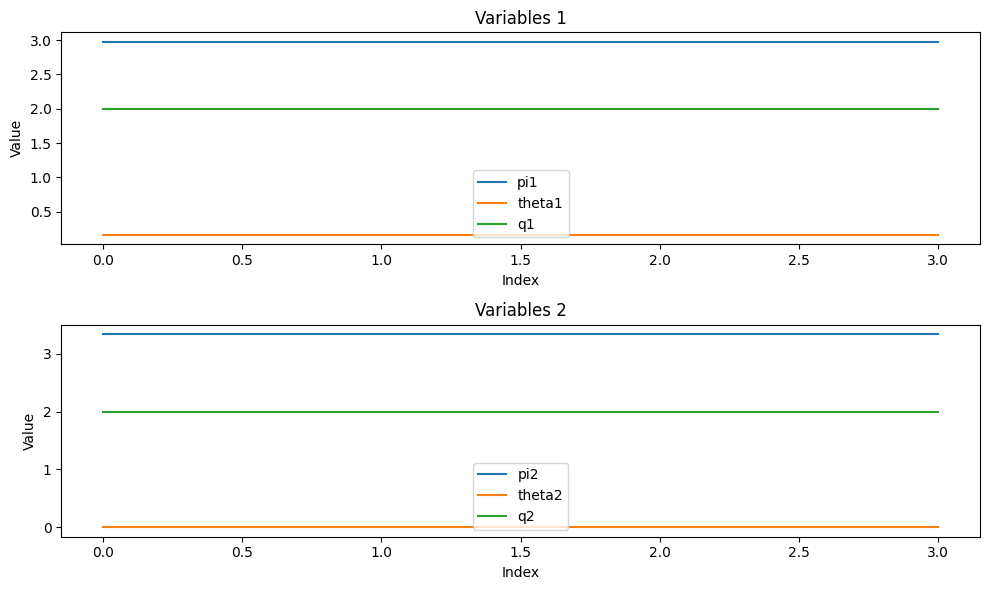

In [9]:
visualize_cycle([Cycles.most_found_cycle()[0][0]])

In [11]:
len(Cycles.subcompetitive_profit_cycles())

27

In [13]:
len(Cycles.found_cycles)

511